In [189]:
%matplotlib inline

import pandas as  pd
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
import seaborn as sns

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
import csv

# just for the sake of this blog post!
from warnings import filterwarnings
filterwarnings('ignore')

In [219]:
'''
AFTER EXPLANATORY ANALYSIS SHOWN FURTHER DOWN IT WAS DETERMINED THAT
THE VARIABLES THAT HAVE THE BIGGEST EFFECT ARE TEMP AND HUMIDITY
this following function preprocesses that data, by only selecting these
features, fills their na values and separates them into separate cities

'''


# make function to preprocess data
def preprocess_data(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
    
    # select features we want
    features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 
                 'station_min_temp_c']
    df = df[features]
    
    # fill missing values
    df.fillna(method='ffill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        #df = df.join(labels)
    
    # separate san juan and iquitos
    sj_features = df.loc['sj']
    iq_features = df.loc['iq']
    sj_labels = labels.loc['sj']
    iq_labels = labels.loc['iq']
    return sj_features, iq_features, sj_labels, iq_labels



In [220]:
sj_features, iq_features, sj_labels, iq_labels = preprocess_data(
                                                            'data/dengue_features_train.csv',
                                                            labels_path="data/dengue_labels_train.csv")

In [221]:
#since data is linear it makes sense to separate data linearly
#split train and test data
sj_feat_train = sj_features.head(800)
sj_labels_train = sj_labels.head(800)
sj_feat_test = sj_features.tail(sj_features.shape[0] - 800)
sj_labels_test = sj_labels.tail(sj_labels.shape[0] - 800)



iq_feat_train = iq_features.head(400)
iq_labels_train = iq_labels.head(400)
iq_feat_test = iq_features.tail(iq_features.shape[0] - 400)
iq_labels_test = iq_labels.tail(iq_labels.shape[0] - 400)

In [222]:
iq_feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(iq_features)
sj_feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(sj_features)

In [204]:
# Build 3 layer DNN with 10, 20, 10 units respectively
iq_regressor = tf.contrib.learn.DNNRegressor(feature_columns=iq_feature_columns, 
                                            hidden_units=[512, 256, 128], 
                                            optimizer=tf.train.AdamOptimizer(
                                                learning_rate=.03
                                            ))
sj_regressor = tf.contrib.learn.DNNRegressor(feature_columns=sj_feature_columns, 
                                            hidden_units=[512, 256, 128],
                                            optimizer=tf.train.AdamOptimizer(
                                                learning_rate=.03
                                            ))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11bce0160>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/98/8l5yvjyn5hlbh6nxjddn37jm0000gn/T/tmp3kx5sp9k'}
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1182d0f98>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evalu

In [209]:
#fitting regressor iq
iq_regressor.fit(iq_feat_train, iq_labels_train, steps=1000)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Res

DNNRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x11bce0fd0>, 'hidden_units': [512, 256, 128], 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float64, normalizer=None),), 'optimizer': <tensorflow.python.training.adam.AdamOptimizer object at 0x11bce0eb8>, 'activation_fn': <function relu at 0x113c7d1e0>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [210]:
#fitting regressor sj
sj_regressor.fit(sj_feat_train, sj_labels_train, steps=1000)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Res

DNNRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x11bce0c18>, 'hidden_units': [512, 256, 128], 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float64, normalizer=None),), 'optimizer': <tensorflow.python.training.adam.AdamOptimizer object at 0x11bce0d68>, 'activation_fn': <function relu at 0x113c7d1e0>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [211]:
iq_predictions = list(iq_regressor.predict(iq_feat_test, as_iterable=True))
score = metrics.mean_absolute_error(iq_labels_test, iq_predictions)
print("Mean Error: {0:f}".format(score))
#iq_labels_test.total_cases

Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /var/folders/98/8l5yvjyn5hlbh6nxjddn37jm0000gn/T/tmp3kx5sp9k/model.ckpt-1100
Mean Error: 7.008809


In [212]:
sj_predictions = list(sj_regressor.predict(sj_feat_test, as_iterable=True))
score = metrics.mean_absolute_error(sj_labels_test, sj_predictions)
print("Mean Error: {0:f}".format(score))

Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /var/folders/98/8l5yvjyn5hlbh6nxjddn37jm0000gn/T/tmpebjon8zf/model.ckpt-1100
Mean Error: 26.695258


In [ ]:
# Run model with test data -- for dengAI submission

In [126]:
sj_features, iq_features, sj_labels, iq_labels = preprocess_data(
                                                            'data/dengue_features_test.csv',
                                                            labels_path="data/dengue_labels_test.csv")

In [197]:
sj_predictions = list(sj_regressor.predict(sj_features, as_iterable=True))
iq_predictions = list(iq_regressor.predict(iq_features, as_iterable=True))


sj_predictions = list(map(int, sj_predictions))
iq_predictions = list(map(int, iq_predictions))

Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /var/folders/98/8l5yvjyn5hlbh6nxjddn37jm0000gn/T/tmpbsmk40vi/model.ckpt-1000
Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /var/folders/98/8l5yvjyn5hlbh6nxjddn37jm0000gn/T/tmpuxkka

In [223]:
# make function to preprocess data
def preprocess_data_subm(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
    
    # select features we want
    features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 
                 'station_min_temp_c']
    df = df[features]
    
    # fill missing values
    df.fillna(method='ffill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path)
        #df = df.join(labels)
    
    # separate san juan and iquitos
    sj_features = df.loc['sj']
    iq_features = df.loc['iq']
    sj_labels = labels[labels.city == 'sj']
    iq_labels = labels[labels.city == 'iq']
    return sj_features, iq_features, sj_labels, iq_labels

sj_features, iq_features, sj_labels, iq_labels = preprocess_data_subm(
                                                            'data/dengue_features_test.csv',
                                                            labels_path="data/dengue_labels_test.csv")

In [199]:
test_features = pd.read_csv("data/dengue_features_test.csv",index_col=[0,1,2])
test_labels = pd.read_csv("data/dengue_labels_test.csv")
sj_labels.total_cases = sj_predictions
iq_labels.total_cases = iq_predictions
submission = pd.concat([sj_labels,iq_labels])
submission
submission.to_csv("submission/benchmark.csv", index=False)


In [ ]:
#_------------------------------------------------------------------
#EXPLANATORY ANALYSIS FOLLOWS
#-------------------------------------------------------------------

# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

In [4]:
print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (936, 21)
labels  :  (936, 1)

Iquitos
features:  (520, 21)
labels  :  (520, 1)


In [5]:
# Remove `week_start_date` string.
sj_train_features.drop('week_start_date', axis=1, inplace=True)
iq_train_features.drop('week_start_date', axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


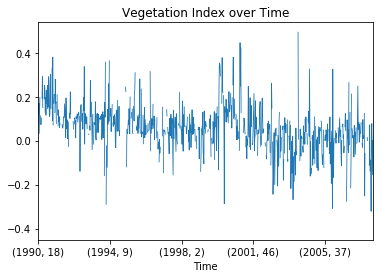

In [15]:
# Null check
#pd.isnull(sj_train_features).any()

(sj_train_features
     .ndvi_ne
     .plot
     .line(lw=0.8))

plt.title('Vegetation Index over Time')
plt.xlabel('Time')



In [16]:
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [17]:
#distribution of labels
print('San Juan')
print('mean: ', sj_train_labels.mean()[0])
print('var :', sj_train_labels.var()[0])

print('\nIquitos')
print('mean: ', iq_train_labels.mean()[0])
print('var :', iq_train_labels.var()[0])

San Juan
mean:  34.1805555556
var : 2640.04543969

Iquitos
mean:  7.56538461538
var : 115.895523937


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10826f128>]], dtype=object)

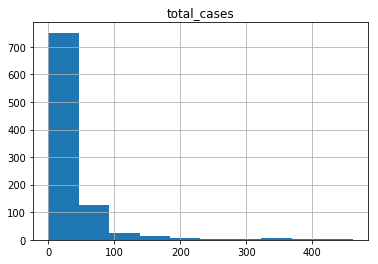

In [18]:
sj_train_labels.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1084fd5f8>]], dtype=object)

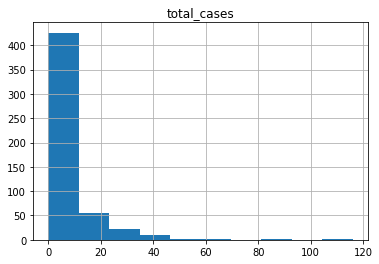

In [19]:
iq_train_labels.hist()

In [ ]:
#variance  >>  mean suggests total_cases can be described by a negative
# binomial distribution, so we'll use a negative binomial regression below.

In [27]:
#add total cases column in features train data
sj_train_features['total_cases'] = sj_train_labels.total_cases
iq_train_features['total_cases'] = iq_train_labels.total_cases

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
# compute correlations matrix
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()

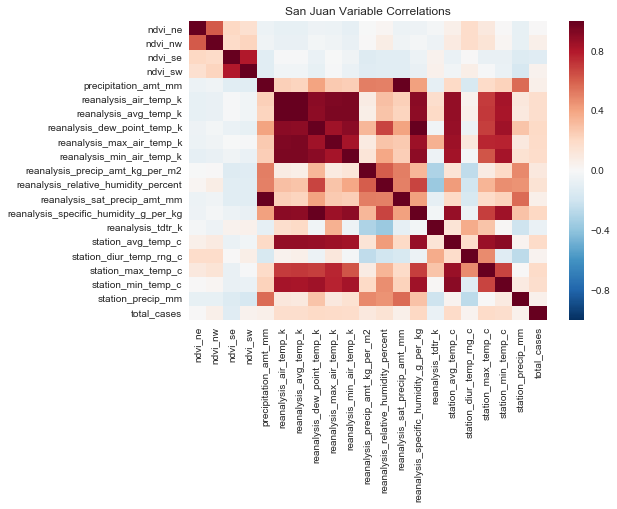

In [29]:
# plot san juan
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Variable Correlations')

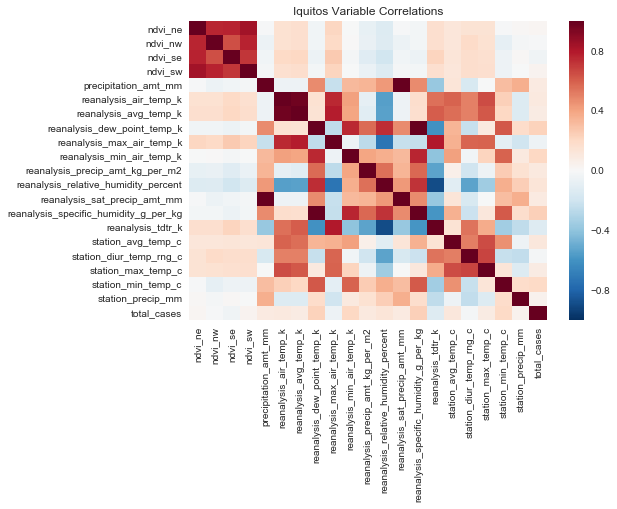

In [30]:
# plot iquitos
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title('Iquitos Variable Correlations')

In [31]:
#the total_cases variable doesn't have many obvious strong correlations.

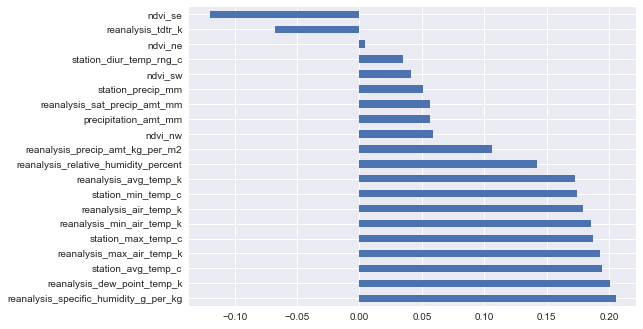

In [32]:
#sorted look at correlations
# San Juan
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

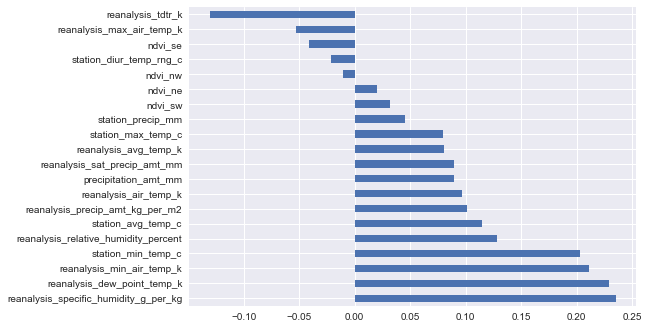

In [33]:
# Iquitos
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

In [34]:
#END OF BASIC EXPLORATORY ANALYSIS --------------------------------------------------------
# make function to preprocess data
def preprocess_data(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
    
    # select features we want
    features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 
                 'station_min_temp_c']
    df = df[features]
    
    # fill missing values
    df.fillna(method='ffill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df = df.join(labels)
    
    # separate san juan and iquitos
    sj = df.loc['sj']
    iq = df.loc['iq']
    
    return sj, iq


In [36]:
sj_train, iq_train = preprocess_data('data/dengue_features_train.csv',
                                    labels_path="data/dengue_labels_train.csv")

In [37]:
sj_train.describe()

,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,station_avg_temp_c,station_min_temp_c,total_cases
count,936.000000,936.000000,936.000000,936.000000,936.000000
mean,16.547535,295.104736,26.999191,22.594017,34.180556
std,1.560663,1.570075,1.415079,1.506281,51.381372
min,11.715714,289.642857,22.842857,17.800000,0.000000
25%,15.233571,293.843929,25.842857,21.700000,9.000000
50%,16.835000,295.451429,27.214286,22.800000,19.000000
75%,17.854286,296.415714,28.175000,23.900000,37.000000
max,19.440000,297.795714,30.071429,25.600000,461.000000


In [38]:
iq_train.describe()

,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,station_avg_temp_c,station_min_temp_c,total_cases
count,520.000000,520.000000,520.000000,520.000000,520.000000
mean,17.102019,295.498723,27.506331,21.210385,7.565385
std,1.443048,1.414360,0.908973,1.257734,10.765478
min,12.111429,290.088571,21.400000,14.700000,0.000000
25%,16.121429,294.596429,26.957500,20.600000,1.000000
50%,17.428571,295.852143,27.587500,21.400000,5.000000
75%,18.180357,296.557143,28.075000,22.000000,9.000000
max,20.461429,298.450000,30.800000,24.200000,116.000000
